# _expression_.zpc(_`algo`_ = `"auto"`)

Generate the ZPC automaton from an expression. Its initial state is final and has the weight of its constant term. It can take an optionnal argument valued with "compact" to enable the compact variant construction.

The _`algo`_ can be:
- `"auto"`: same as `"regular"`.
- `"compact"`: use an alternate implementation for sum and product which requires fewer states.
- `"regular"`: produce the "pure" version of the ZPC automaton.

Post-condition:
- `Result.is_eps_acyclic()`
- There is no spontaneous path from the initial state to final the state.

Caveats:
- the context of the result might be different from the original context: spontaneous-transition support is required.

See also:
- [_expression_.standard](expression.standard.ipynb)
- [_expression_.thompson](expression.thompson.ipynb)

## Examples

The ZPC procedure generates an automaton with spontaneous-transitions, which requires a labelset that feature a "one" label.
The nullableset and wordset labelsets (and their compositions) does support a "one" label.

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

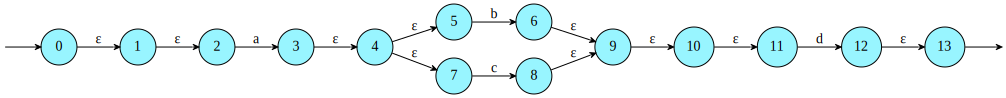

In [1]:
import vcsn
vcsn.b.expression('a[bc]d').zpc()

You can also ask for the **compact** version of the algorithm that way:

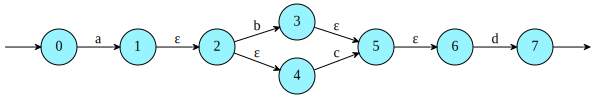

In [2]:
vcsn.b.expression('a[bc]d').zpc('compact')

You may, however, use a labelset which does not feature a "one", in which case the context of the automaton will be different from the one of the expression.

In [3]:
vcsn.b.expression("a").zpc().context()

nullableset<letterset<char_letters(abcd)>>, b

### Weighted expressions

Weights are supported.

In [4]:
r = vcsn.context('lan_char(abc), q').expression('(<1/6>a*+<1/3>b*?)*')
r

(<1/6>a*+<1/3>(\e+b*))*

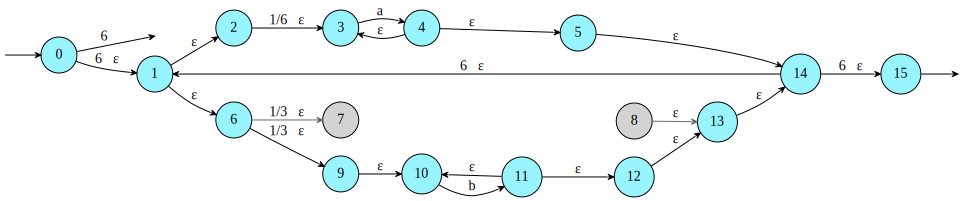

In [5]:
r.zpc()

And the compact version:

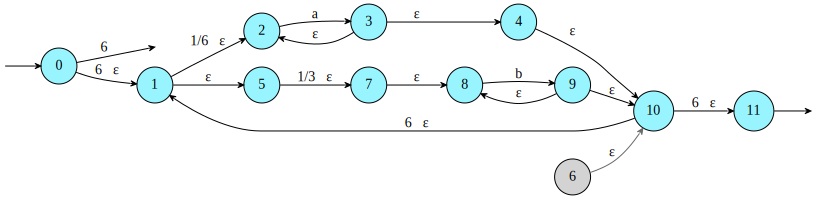

In [6]:
r.zpc('compact')